In [61]:
import pandas as pd


df = pd.read_csv("data/preprocessed_train.csv", index_col="id")

In [62]:
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511
5,0.594579,-11.715431,0.101701,0.000005,0.259634,0.024300,0.639254,161012.2221,0.938333,151.43602


In [63]:
from sklearn.metrics import root_mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
y = df['BeatsPerMinute']
X = df.drop(columns=['BeatsPerMinute'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [55]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [7]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.01,
}
n = 50
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)

In [8]:
preds = model.predict(xgb_test)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.287755713557807
r2 of the model is: 0.00042902046121373605


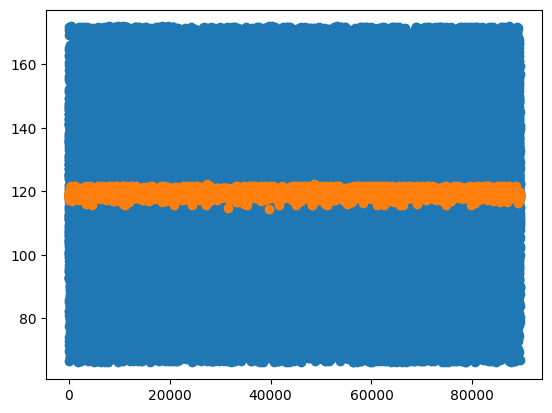

In [9]:
import matplotlib.pyplot as plt



plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [10]:
import numpy as np

preds = np.array([y_train.mean()] * len(y_test))

In [11]:
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the mean is:', rmse)
print('r2 of the mean is:', r2)

rmse of the mean is: 23.292852019483835
r2 of the mean is: -8.520791726418508e-06


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -23.339442134544385


In [13]:
best_model = grid_search.best_estimator_

In [14]:
preds = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.285767605407692
r2 of the model is: 0.0005996827103466051


In [15]:
best_model.feature_importances_

array([0.13685244, 0.06887731, 0.07109366, 0.08081007, 0.05999668,
       0.11260118, 0.24509571, 0.1340483 , 0.09062473], dtype=float32)

In [16]:
X_train.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
id,,,,,,,,,
24994,0.583060,-9.269429,0.101150,0.053240,0.000001,0.232535,0.379670,344867.5465,0.863867
11129,0.462549,-7.028528,0.136623,0.010928,0.267938,0.341289,0.415446,270144.3437,0.639800
187859,0.703008,-1.357000,0.058488,0.223777,0.000001,0.156637,0.672463,264738.7939,0.737867
154769,0.558958,-12.948542,0.046433,0.392411,0.222384,0.147898,0.603788,221915.9513,0.057867
183606,0.914623,-3.673236,0.023500,0.222965,0.237300,0.079443,0.303056,321783.8640,0.490733


In [17]:
X_train_subset = X_train[['LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs']]
X_test_subset = X_test[['LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs']]

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model objecat
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_subset, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -23.339882019805035


In [19]:
best_model = grid_search.best_estimator_

In [20]:
preds = best_model.predict(X_test_subset)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.287570038543798
r2 of the model is: 0.00044495970568447785


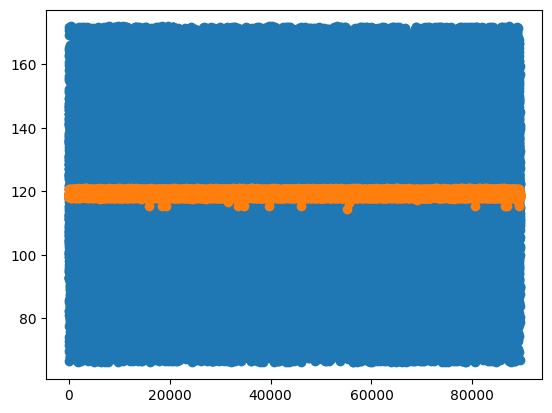

In [21]:
import matplotlib.pyplot as plt



plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [22]:
best_model.feature_importances_

array([0.23752432, 0.54087293, 0.22160277], dtype=float32)

In [23]:
X_train_subset2 = X_train_subset[['LivePerformanceLikelihood', 'MoodScore']]
X_test_subset2 = X_test_subset[['LivePerformanceLikelihood', 'MoodScore']]

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model objecat
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_subset2, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -23.34079589714519


In [25]:
best_model = grid_search.best_estimator_

In [26]:
preds = best_model.predict(X_test_subset2)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.288914592861257
r2 of the model is: 0.0003295337646581631


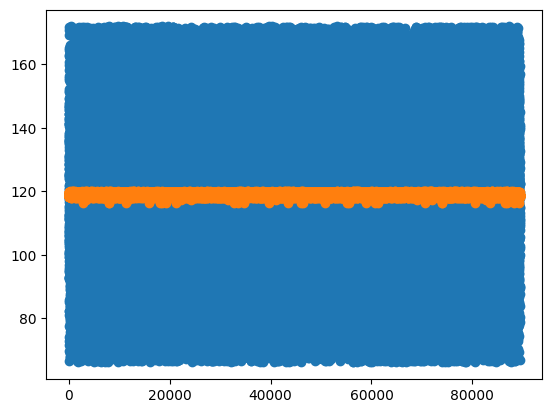

In [27]:
import matplotlib.pyplot as plt



plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [28]:
X_train_subset3 = X_train_subset['MoodScore']
X_test_subset3 = X_test_subset['MoodScore']

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model objecat
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_subset3, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -23.34170575737928


In [30]:
best_model = grid_search.best_estimator_

In [31]:
preds = best_model.predict(X_test_subset3)
rmse = root_mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.288864391323422
r2 of the model is: 0.0003338435353386071


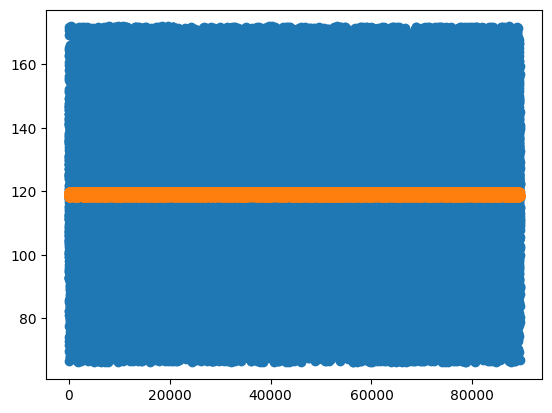

In [32]:
import matplotlib.pyplot as plt



plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.to_frame())
y_test_scaled = scaler.fit_transform(y_test.to_frame())

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model objecat
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_subset, y_train_scaled)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 1}
Best score:  -0.9998239051913289


In [35]:
best_model = grid_search.best_estimator_

In [36]:
preds = best_model.predict(X_test_subset)
rmse = root_mean_squared_error(y_test_scaled, preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 0.9997734436760254
r2 of the model is: -25.955522292160364


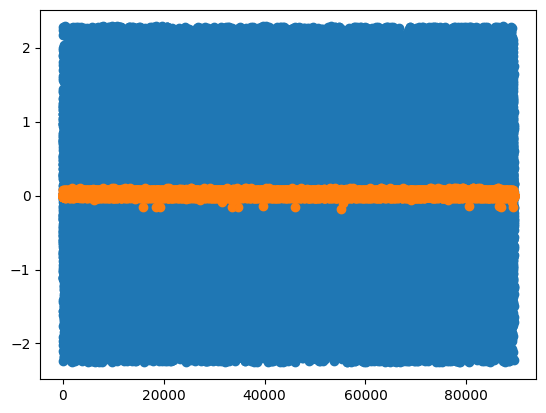

In [37]:
plt.scatter(range(len(y_test_scaled)), y_test_scaled)
plt.scatter(range(len(y_test_scaled)), preds)

In [38]:
X_train

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
id,,,,,,,,,
24994,0.583060,-9.269429,0.101150,0.053240,0.000001,0.232535,0.379670,344867.5465,0.863867
11129,0.462549,-7.028528,0.136623,0.010928,0.267938,0.341289,0.415446,270144.3437,0.639800
187859,0.703008,-1.357000,0.058488,0.223777,0.000001,0.156637,0.672463,264738.7939,0.737867
154769,0.558958,-12.948542,0.046433,0.392411,0.222384,0.147898,0.603788,221915.9513,0.057867
183606,0.914623,-3.673236,0.023500,0.222965,0.237300,0.079443,0.303056,321783.8640,0.490733
...,...,...,...,...,...,...,...,...,...
180126,0.481746,-8.831346,0.023500,0.284871,0.114568,0.113876,0.242246,181351.2715,0.349867
445874,0.666033,-5.471489,0.023500,0.462536,0.333526,0.056027,0.402427,285935.6299,0.367200
223838,0.590220,-1.357000,0.152995,0.086785,0.296954,0.170597,0.978000,141697.8414,0.834267


In [78]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [144]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_

In [145]:
sum(explained_variance)

np.float64(0.42759051493538236)

In [146]:
xgb_model = xgb.XGBRegressor(**{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.9})
xgb_model.fit(X_train_reduced, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [147]:
preds = xgb_model.predict(X_test_reduced)
rmse = root_mean_squared_error(y_test, preds)
r2 = r2_score(y_test,preds)
print('rmse of the model is:', rmse)
print('r2 of the model is:', r2)

rmse of the model is: 23.29754265112163
r2 of the model is: -0.0004113176580908817


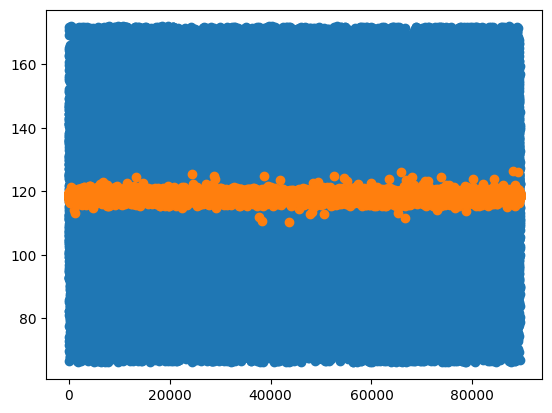

In [148]:
plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), preds)

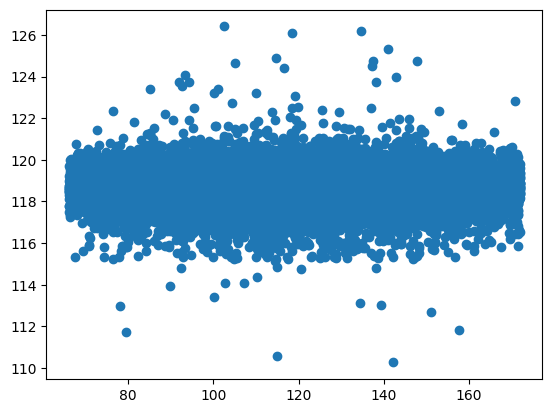

In [149]:
plt.scatter(y_test, preds)